In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# Parameters 
n = 1000 # number of users
p = 0.6 # parameter being estimated

In [3]:
X = [1 if np.random.random() <= p else 0 for i in range(n)]

In [4]:
# THE INCORRECT CLAIM FROM THE PAPER
n = 10000
m = 400
assert m <= n/8 



0.5 0.5294650923641242


<AxesSubplot:ylabel='Frequency'>

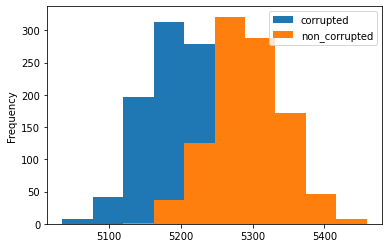

In [5]:
# This is # CLAIM 3.5 in the paper: It has no dependence on epsilon
log_6 = np.log(6)
two_n = 2*n 
mu_mn = m/n + np.sqrt(2*log_6/n)

p_0 = 1/2
p_1 = 1/2 + 1/2*mu_mn
print(p_0, p_1)
d = {'corrupted': [], 'non_corrupted': []}
for epoch in range(1000):
    d['corrupted'].append(np.random.binomial(n-m, p_0)+m)
    d['non_corrupted'].append(np.random.binomial(n, p_1))
    
pd.DataFrame(d).plot(kind='hist')

0.5 0.5058156820408254


<AxesSubplot:ylabel='Frequency'>

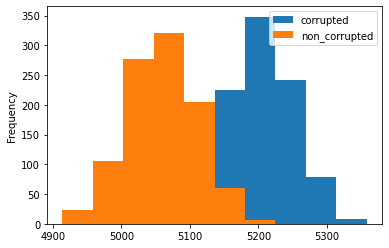

In [6]:
# THE CORRECTED FORMULAE with dependence on epsilon
eps = 0.1
tmp = (np.e**eps-1)/(np.e**eps+1)
mu_mne = mu_mn*tmp
p_2 = 1/2 + 1/2*mu_mne
print(p_0, p_2)

d = {'corrupted': [], 'non_corrupted': []}
for epoch in range(1000):
    d['corrupted'].append(np.random.binomial(n-m, p_0)+m)
    d['non_corrupted'].append(np.random.binomial(n, p_2))
    
pd.DataFrame(d).plot(kind='hist')

0.5 0.6492845829486155


<AxesSubplot:ylabel='Frequency'>

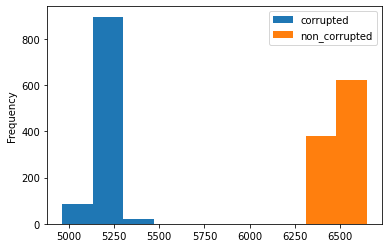

In [7]:
####### USING THE FORMULA in the paper
tmp = (np.e**eps+1)/(np.e**eps-1) #<------
##############################

mu_mne = mu_mn*tmp

p_2 = 1/2 + 1/2*mu_mne
print(p_0, p_2)

d = {'corrupted': [], 'non_corrupted': []}
for epoch in range(1000):
    d['corrupted'].append(np.random.binomial(n-m, p_0)+m)
    d['non_corrupted'].append(np.random.binomial(n, p_2))
    
pd.DataFrame(d).plot(kind='hist')
